<a href="https://colab.research.google.com/github/lucasfreire01/Cancer_pele/blob/main/Cancer_pele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install cloudpathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
!pip install pyvips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!apt list libvips

Listing... Done


In [18]:
!apt install libvips

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libvips42' instead of 'libvips'
libvips42 is already the newest version (8.9.1-2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [19]:
!pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
import numpy as np
from cloudpathlib import S3Path
import matplotlib.pyplot as plt
import pyvips
from PIL import Image

In [22]:
Image.MAX_IMAGE_PIXELS = None

In [23]:
train = pd.read_csv('/content/drive/MyDrive/Cancer_pele/train_metadata_pPa7YD3.csv')
train

,filename,age,sex,body_site,melanoma_history,breslow,ulceration,resolution,tif_cksum,tif_size,us_tif_url,eu_tif_url,as_tif_url
0,1u4lhlqb.tif,[32:34[,2,thigh,YES,<0.8,NO,0.264384,3028450373,747151312,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
1,rqumqnfp.tif,[46:48[,1,trunc,NO,[1 : 2[,NO,0.264384,1294832049,591027450,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
2,bu5xt1xm.tif,[64:66[,2,face,NO,<0.8,NO,0.264384,774102360,465947458,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
3,dibvu7wk.tif,[62:64[,2,forearm,NaN,[2 : 4[,YES,0.226490,515827065,568174704,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
4,qsza4coh.tif,[90:92[,2,face,NO,[1 : 2[,NO,0.226490,1541795099,1042691978,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,n7jd638y.tif,[68:70[,1,head/neck,NaN,[1 : 2[,NO,0.250000,1949851255,136729436,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
1338,8wg601oe.tif,[66:68[,1,head/neck,NaN,<0.8,NaN,0.250000,1344207528,1603484314,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
1339,1ejfd01b.tif,[80:82[,1,trunk,NaN,>=4,YES,0.250000,4292211076,1423564688,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...
1340,2ztrjp20.tif,[42:44[,2,trunk,NaN,<0.8,NaN,0.250000,2949914817,336489430,s3://drivendata-competition-visiomel-public-us...,s3://drivendata-competition-visiomel-public-eu...,s3://drivendata-competition-visiomel-public-as...


In [24]:
train_labels = pd.read_csv('/content/drive/MyDrive/Cancer_pele/train_labels.csv')
train_labels

,filename,relapse
0,1u4lhlqb.tif,0
1,rqumqnfp.tif,0
2,bu5xt1xm.tif,0
3,dibvu7wk.tif,0
4,qsza4coh.tif,0
...,...,...
1337,n7jd638y.tif,0
1338,8wg601oe.tif,0
1339,1ejfd01b.tif,0
1340,2ztrjp20.tif,0


In [29]:
seed = 42
num_images = 3
select_image = train.sample(
    random_state=seed, n=num_images).us_tif_url.values

In [30]:
def visualize_page(page_num, image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 10))
    fig.tight_layout()

    for n, image_s3_path in enumerate(image_paths):
        fname = S3Path(image_s3_path).name
        print(f"Downloading {fname}")
        local_file = S3Path(image_s3_path).fspath

        n_frames = Image.open(local_file).n_frames
        img = pyvips.Image.new_from_file(local_file, page=page_num).numpy()

        axes[n].set_title(f"{fname}, page={page_num}\n {img.shape}\n")
        axes[n].imshow(img)

NoCredentialsError: ignored

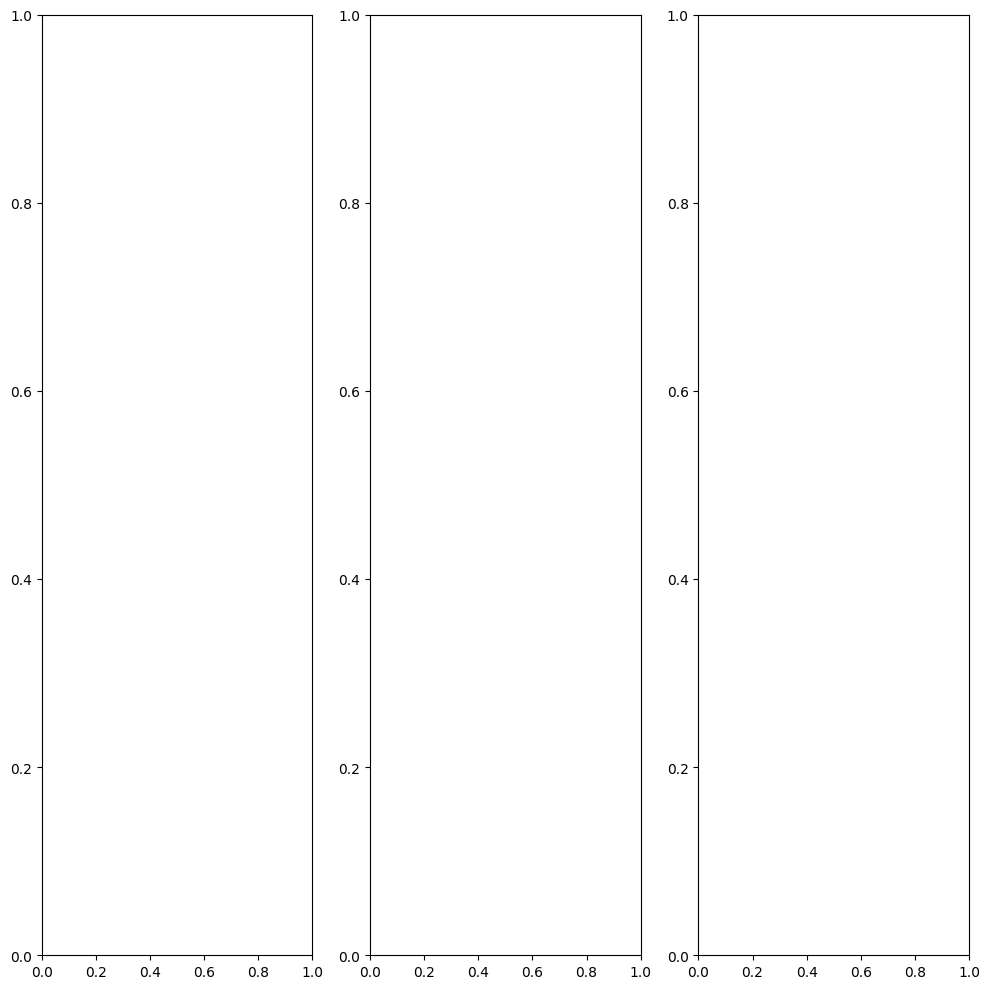

In [31]:
visualize_page(3, select_image)